In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("/content/train_loan_preprocess.csv")

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data.shape

(614, 13)

In [12]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)

In [41]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
data['Married'].fillna(data['Married'].mode()[0],inplace=True)

<Axes: xlabel='Dependents', ylabel='Count'>

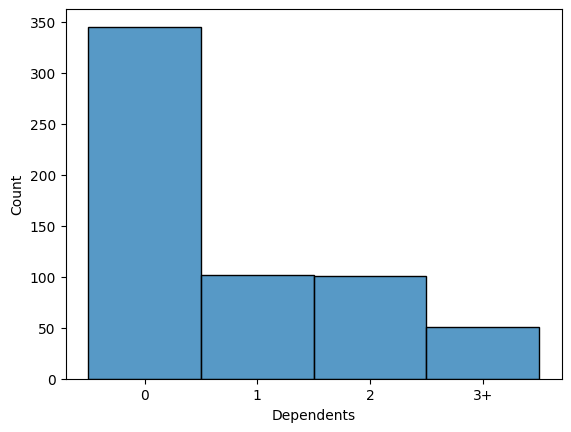

In [18]:
sns.histplot(data['Dependents'])

In [19]:
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)

In [21]:
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)

<Axes: xlabel='LoanAmount', ylabel='Count'>

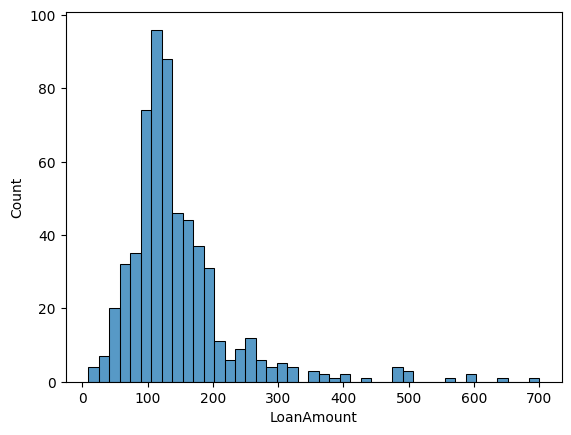

In [24]:
sns.histplot(data['LoanAmount'])

In [28]:
data['LoanAmount'].fillna(data['LoanAmount'].mode()[0],inplace=True)

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

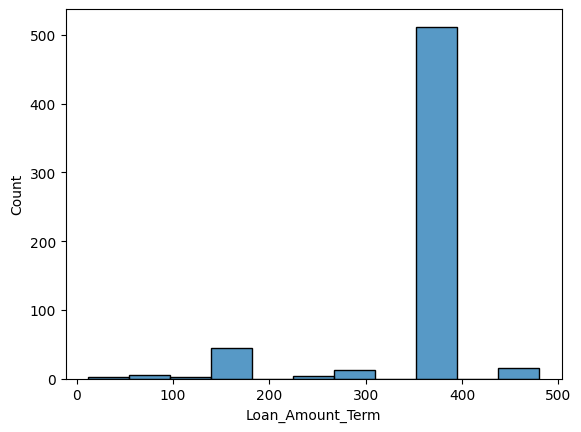

In [32]:
sns.histplot(data['Loan_Amount_Term'])

In [35]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)

<Axes: xlabel='Credit_History', ylabel='Count'>

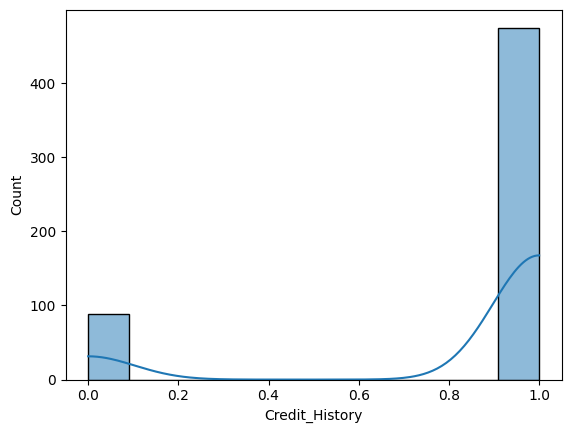

In [38]:
sns.histplot(data['Credit_History'],kde=True)

In [40]:
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

In [43]:
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [44]:
data['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7a2c38e53040>,
 'caps': [<matplotlib.lines.Line2D at 0x7a2c38e536d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a2c38ef3e80>],
 'medians': [<matplotlib.lines.Line2D at 0x7a2c38dcd8a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a2c38dcdbd0>],
 'means': []}

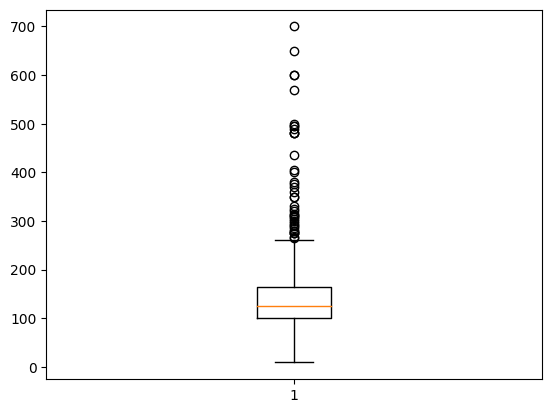

In [45]:
plt.boxplot(data['LoanAmount'])

In [92]:
data['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [103]:
data_enc=pd.get_dummies(data,columns=['Dependents','Loan_Status','Education'],dtype=int,drop_first=True)

In [95]:
data_enc

,Loan_ID,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents_1,Dependents_2,Dependents_3+,Loan_Status_Y,Education_Not Graduate
0,LP001002,Male,No,No,5849,0.0,120.0,360.0,1.0,Urban,0,0,0,1,0
1,LP001003,Male,Yes,No,4583,1508.0,128.0,360.0,1.0,Rural,1,0,0,0,0
2,LP001005,Male,Yes,Yes,3000,0.0,66.0,360.0,1.0,Urban,0,0,0,1,0
3,LP001006,Male,Yes,No,2583,2358.0,120.0,360.0,1.0,Urban,0,0,0,1,1
4,LP001008,Male,No,No,6000,0.0,141.0,360.0,1.0,Urban,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,No,2900,0.0,71.0,360.0,1.0,Rural,0,0,0,1,0
610,LP002979,Male,Yes,No,4106,0.0,40.0,180.0,1.0,Rural,0,0,1,1,0
611,LP002983,Male,Yes,No,8072,240.0,253.0,360.0,1.0,Urban,1,0,0,1,0
612,LP002984,Male,Yes,No,7583,0.0,187.0,360.0,1.0,Urban,0,1,0,1,0


In [104]:
le = LabelEncoder()
data_enc['Gender'] = le.fit_transform(data_enc['Gender'])

In [52]:
data_enc

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_1,Dependents_2,Dependents_3+
0,LP001002,1,No,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,0,0,0
1,LP001003,1,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,0,0
2,LP001005,1,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,0,0
3,LP001006,1,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,0,0
4,LP001008,1,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,No,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0,0,0
610,LP002979,1,Yes,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,0,0,1
611,LP002983,1,Yes,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,1,0,0
612,LP002984,1,Yes,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0,1,0


In [105]:
le = LabelEncoder()
data_enc['Married'] = le.fit_transform(data_enc['Married'])

In [91]:
data_enc

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_Y
0,LP001002,Male,0,0,0,0,5849,0.0,120.0,360.0,1.0,Urban,1
1,LP001003,Male,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,0,0,0,0,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,1,3+,0,0,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,1,1,0,0,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,1,2,0,0,7583,0.0,187.0,360.0,1.0,Urban,1


In [58]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [89]:
le = LabelEncoder()
data_enc['Education'] = le.fit_transform(data_enc['Education'])

In [70]:
data_enc

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_1,Dependents_2,Dependents_3+
0,LP001002,1,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,0,0,0
1,LP001003,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,0,0
2,LP001005,1,1,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,0,0
3,LP001006,1,1,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,0,0
4,LP001008,1,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0,0,0
610,LP002979,1,1,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,0,0,1
611,LP002983,1,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,1,0,0
612,LP002984,1,1,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0,1,0


In [98]:
data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [106]:
le = LabelEncoder()
data_enc['Self_Employed'] = le.fit_transform(data_enc['Self_Employed'])

In [88]:
data_enc

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_Y
0,LP001002,Male,No,0,Graduate,0,5849,0.0,120.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,0,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,0,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,0,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,0,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,0,7583,0.0,187.0,360.0,1.0,Urban,1


In [99]:
data['Property_Area'].unique()

In [107]:
ordinal=OrdinalEncoder(categories=[['Urban', 'Rural', 'Semiurban']])
data_enc['Property_Area']=ordinal.fit_transform(data[['Property_Area']])

In [108]:
data_enc

,Loan_ID,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents_1,Dependents_2,Dependents_3+,Loan_Status_Y,Education_Not Graduate
0,LP001002,1,0,0,5849,0.0,120.0,360.0,1.0,0.0,0,0,0,1,0
1,LP001003,1,1,0,4583,1508.0,128.0,360.0,1.0,1.0,1,0,0,0,0
2,LP001005,1,1,1,3000,0.0,66.0,360.0,1.0,0.0,0,0,0,1,0
3,LP001006,1,1,0,2583,2358.0,120.0,360.0,1.0,0.0,0,0,0,1,1
4,LP001008,1,0,0,6000,0.0,141.0,360.0,1.0,0.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,2900,0.0,71.0,360.0,1.0,1.0,0,0,0,1,0
610,LP002979,1,1,0,4106,0.0,40.0,180.0,1.0,1.0,0,0,1,1,0
611,LP002983,1,1,0,8072,240.0,253.0,360.0,1.0,0.0,1,0,0,1,0
612,LP002984,1,1,0,7583,0.0,187.0,360.0,1.0,0.0,0,1,0,1,0


In [111]:
data_enc

,Loan_ID,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents_1,Dependents_2,Dependents_3+,Loan_Status_Y,Education_Not Graduate
0,LP001002,1,0,0,5849,0.0,120.0,360.0,1.0,0.0,0,0,0,1,0
1,LP001003,1,1,0,4583,1508.0,128.0,360.0,1.0,1.0,1,0,0,0,0
2,LP001005,1,1,1,3000,0.0,66.0,360.0,1.0,0.0,0,0,0,1,0
3,LP001006,1,1,0,2583,2358.0,120.0,360.0,1.0,0.0,0,0,0,1,1
4,LP001008,1,0,0,6000,0.0,141.0,360.0,1.0,0.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,2900,0.0,71.0,360.0,1.0,1.0,0,0,0,1,0
610,LP002979,1,1,0,4106,0.0,40.0,180.0,1.0,1.0,0,0,1,1,0
611,LP002983,1,1,0,8072,240.0,253.0,360.0,1.0,0.0,1,0,0,1,0
612,LP002984,1,1,0,7583,0.0,187.0,360.0,1.0,0.0,0,1,0,1,0


In [114]:
data['Loan_Amount_Term'].unique()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [115]:
num_cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [116]:
data_std=data_enc.copy()
std_scalar=StandardScaler()
data_std[num_cols]=std_scalar.fit_transform(data_enc[num_cols])
data_std

,Loan_ID,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents_1,Dependents_2,Dependents_3+,Loan_Status_Y,Education_Not Graduate
0,LP001002,1,0,0,0.072991,-0.554487,-0.302759,0.273231,1.0,0.0,0,0,0,1,0
1,LP001003,1,1,0,-0.134412,-0.038732,-0.207648,0.273231,1.0,1.0,1,0,0,0,0
2,LP001005,1,1,1,-0.393747,-0.554487,-0.944757,0.273231,1.0,0.0,0,0,0,1,0
3,LP001006,1,1,0,-0.462062,0.251980,-0.302759,0.273231,1.0,0.0,0,0,0,1,1
4,LP001008,1,0,0,0.097728,-0.554487,-0.053093,0.273231,1.0,0.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,-0.410130,-0.554487,-0.885313,0.273231,1.0,1.0,0,0,0,1,0
610,LP002979,1,1,0,-0.212557,-0.554487,-1.253868,-2.522836,1.0,1.0,0,0,1,1,0
611,LP002983,1,1,0,0.437174,-0.472404,1.278459,0.273231,1.0,0.0,1,0,0,1,0
612,LP002984,1,1,0,0.357064,-0.554487,0.493794,0.273231,1.0,0.0,0,1,0,1,0
